# Image to Latex using transformer architecture!

## Introduction

### Image to Markup

This is a project to convert images of mathematical equations to latex markup. The project is based on the paper [Image to Latex](https://arxiv.org/abs/1609.04938) by the team at Stanford. The paper uses a CNN encoder and an LSTM decoder to convert images to latex markup. The paper uses a custom dataset of 400k images of mathematical equations. I'm using dataset from [latex.codecogs](https://latex.codecogs.com/) with 100k annotated images similar to the 100k dataset used in the paper.

[More](https://im2markup.yuntiandeng.com/) about the paper can be found here


## Training models

If you just want to experiment with the trained model, you can skip this section and go to the next section.


### Dataset

The dataset used is from [latex.codecogs](https://latex.codecogs.com/) with 100k annotated images. I used a [script](utils\download_dataset.py) to fetch and download the dataset images from links in the [dataset.json](dataset\dataset.json) file

### Preprocessing

Since the images we'll be dealing with have a lot of white space (since we pass in math formulae images), we'll crop the images to include only the required part (the formula with black text on white background). We'll also resize the images to 256x256. The preprocessing script can be found [here](utils\images_preprocessing.py). We'll also resize it to ensure that the images dont exceed the max size limits (`RESIZE_W = 1500, RESIZE_H = 175`)

## Training

The training script can be found [here](train_model.py). The script uses the [dataset](dataset\dataset.json) to load the images and the corresponding latex markup. The model is a [CNN encoder](encoder.py) and an [LSTM decoder](decoder.py).

The model can be trained by running `python train_model.py`


## Results

Since the preprocessing and training take too long, we made the training script save the model after every epoch. The saved models can be found [here](model_in_usage\checkpoints). We can use the call_model.py script to load the model and run it on images. The script can be found [here](call_model.py). The script takes in the path to the image and the path to the saved model and outputs the predicted latex markup.

Let's run this model on some images and see how it performs. The script to run the model on images can be found [here](Image2Latex.py). The script (mostly a CLI :)) takes in the path to the image and the path to the saved model and outputs the predicted latex markup.


Trying to catch model in d:\school stuff\sem5\ArtificialIntelligence\latex-gen\model_in_usage\...
--Model checkpoints have been detected
--Meta and Tokenizer files have been detected


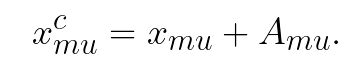

x _ { m l n } ^ { r } = x _ { m _ { l } } + A _ { m u } . 


<IPython.core.display.Math object>

In [20]:
# Run the model
import os
from Image2Latex import check_path, CHECKPOINTS_PATH, MODEL_PATH, META_PATH, TOKENIZER_PATH
from call_model import predict
from IPython.display import display, Math, Image


path = check_path(os.path.abspath('.')) + MODEL_PATH
print(f"Trying to catch model in {path}...")
try:
    if len(os.listdir(path + CHECKPOINTS_PATH)) > 1:
        print(f"--Model checkpoints have been detected")
    if all(os.path.exists(path + p) for p in [META_PATH, TOKENIZER_PATH]):
        print(f"--Meta and Tokenizer files have been detected")
except:
        raise IOError("Model files are missing!\nExpected in '{MODEL_PATH}' folder")

# The image
img_path = input("Enter the path to the image: ")

display(Image(filename=img_path))

if not os.path.exists(img_path):
    raise IOError("Image not found!")

result = predict(img_path, path + TOKENIZER_PATH, path + META_PATH, path + CHECKPOINTS_PATH)


# Render the result
display(Math(result))
